In [3]:
from __future__ import print_function
import numpy as np
from scipy import stats
import os
import json
import pylab as pl
pl.style.use("bmh")
import matplotlib
%matplotlib nbagg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## SIMULATED DATA: A SINE WAVE WITH A PERIOD OF 2$\pi$/10 . 
 # WHAT DOES IT LOOK LIKE IN FOURIER SPACE?

### creating a sine wave

PERIOD =  0.25 number of samples = 880 number of cycles = 8


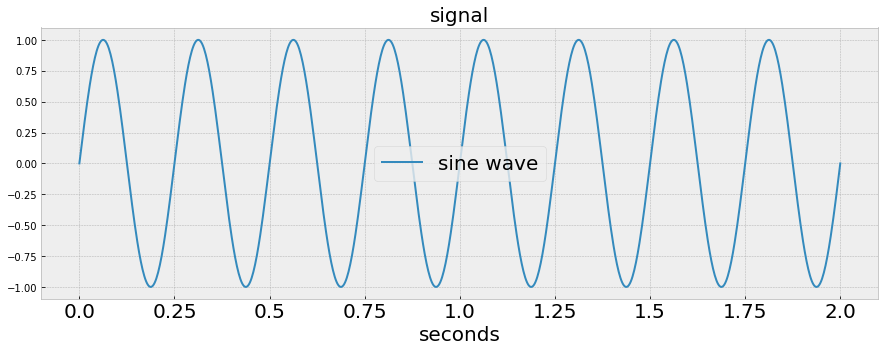

In [13]:
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)

sample_rate = 440 #samples per seconds
duration = 2 #seconds

N = duration * sample_rate #samples (88)
freq = 8 / duration #8 cycles by design
period = 1.0 / freq #sine period (patterns repeats every period)

print ("PERIOD = ", period, "number of samples =", N, "number of cycles =", 8)
x = np.linspace(0, duration, num = N)
sinewave = np.sin(2 * np.pi * freq * x)
ax.plot(x, sinewave, '-', label = "sine wave");
ax.legend(fontsize = 20)
ax.set_xticklabels(ax.get_xticks(), fontsize=20)
pl.xlabel("seconds", fontsize=20)
pl.title("signal", fontsize=20);

PERIOD =  0.25 number of samples = 88 number of cycles = 8


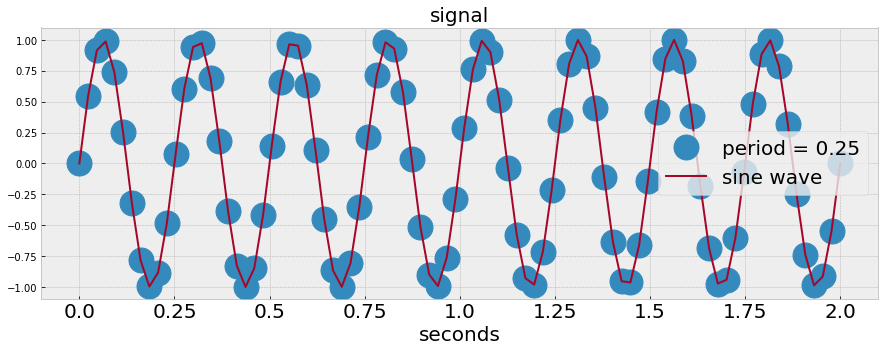

In [4]:
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)

sample_rate = 44 #samples per seconds
duration = 2 #seconds

N = duration * sample_rate #samples (88)
freq = 8 / duration #8 cycles by design
period = 1.0 / freq #sine period (patterns repeats every period)

print ("PERIOD = ", period, "number of samples =", N, "number of cycles =", 8)
x = np.linspace(0, duration, num = N)
sinewave = np.sin(2 * np.pi * freq * x)
ax.plot(x, sinewave, '.', ms=50, label= "period = %.2f"%period);
ax.plot(x, sinewave, '-', label = "sine wave");
ax.legend(fontsize = 20)
ax.set_xticklabels(ax.get_xticks(), fontsize=20)
pl.xlabel("seconds", fontsize=20)
pl.title("signal", fontsize=20);

In [5]:
np.fft?

Fourier transforms are complex numbers of real or complex imputs. Time series are real numbers so we can use rfft (the Fourier Transform of a **Real imput**, which is itself a complex number)

In [ ]:
np.fft.rfft(sinewave) #j indicate complex: the second piece of ecery entry is its complex component

array([ 2.02060590e-14+0.00000000e+00j,  4.35490450e-03-1.21934578e-01j,
        1.82700300e-02-2.55448398e-01j,  4.47483236e-02-4.16220390e-01j,
        9.08116366e-02-6.31608806e-01j,  1.73452110e-01-9.61380410e-01j,
        3.42997525e-01-1.57673418e+00j,  8.35217103e-01-3.27234830e+00j,
        1.21507055e+01-4.13815028e+01j, -1.46636190e+00+4.40571246e+00j,
       -8.14034759e-01+2.18251165e+00j, -6.12519031e-01+1.47875175e+00j,
       -5.15516238e-01+1.12882310e+00j, -4.58993171e-01+9.16951545e-01j,
       -4.22293059e-01+7.73371995e-01j, -3.96735707e-01+6.68662347e-01j,
       -3.78042305e-01+5.88245309e-01j, -3.63863084e-01+5.24062482e-01j,
       -3.52802544e-01+4.71289024e-01j, -3.43981119e-01+4.26854529e-01j,
       -3.36817888e-01+3.88708564e-01j, -3.30914412e-01+3.55427164e-01j,
       -3.25988781e-01+3.25988781e-01j, -3.21836265e-01+2.99640177e-01j,
       -3.18304861e-01+2.75812732e-01j, -3.15279551e-01+2.54068320e-01j,
       -3.12671866e-01+2.34063227e-01j, -3.10412775

# to detect periodicity we use the "power spectrum": *square (or absolute value) of the real part of the fourier transform*


In [ ]:
(np.fft.rfft(sinewave).real)**2

array([4.08284822e-28, 1.89651932e-05, 3.33793997e-04, 2.00241247e-03,
       8.24675335e-03, 3.00856344e-02, 1.17647302e-01, 6.97587609e-01,
       1.47639645e+02, 2.15021724e+00, 6.62652589e-01, 3.75179563e-01,
       2.65756991e-01, 2.10674731e-01, 1.78331427e-01, 1.57399221e-01,
       1.42915985e-01, 1.32396344e-01, 1.24469635e-01, 1.18323010e-01,
       1.13446290e-01, 1.09504348e-01, 1.06268685e-01, 1.03578581e-01,
       1.01317984e-01, 9.94011955e-02, 9.77636956e-02, 9.63560910e-02,
       9.51400123e-02, 9.40852741e-02, 9.31678660e-02, 9.23685077e-02,
       9.16715931e-02, 9.10644067e-02, 9.05365359e-02, 9.00794250e-02,
       8.96860339e-02, 8.93505749e-02, 8.90683088e-02, 8.88353865e-02,
       8.86487266e-02, 8.85059214e-02, 8.84051655e-02, 8.83452043e-02,
       8.83252986e-02])

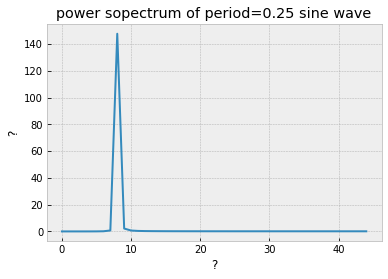

In [8]:
pl.plot(np.square((np.fft.rfft(sinewave).real)));
pl.title ("power sopectrum of period=%.2f sine wave"%period)
pl.xlabel("?")
pl.ylabel("?");

# the x axis is the frequency, and it is a bit tricky: it runs from 0 (period of 0 Hz) to the maximum frequency which is 1/2 the number of samples: 44 here. That is because I need at least 2 points to describe a pattern

### expressing the x axis in physical units: 1/sec = Hz

In [9]:
np.fft.rfftfreq?

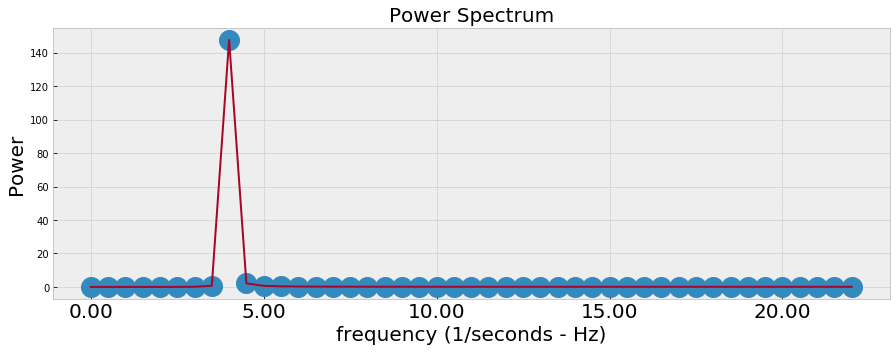

In [10]:
f = (np.fft.rfft(sinewave).real)**2

fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), (f), 'o', ms=20)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), (f), '-')

ax.set_xticklabels([ "%.2f"%(f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("frequency (1/seconds - Hz)", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("Power Spectrum", fontsize=20);

Use numpy.fft.rfft to take the fourier transform of the REAL part of your data (for time series you will always use only the real part) 

take the absolute value of the FFT to suppress imaginary terms and get a positive POWER

[5.69767115e-30 1.60784829e-02 7.08906551e-02 1.89743362e-01
 4.42552986e-01 1.04604118e+00 2.91390623e+00 1.36974107e+01
 1.93327126e+05 1.82870668e+01]


Text(0.5, 0, 'frequency [0, ... , 1/(2-i)*sample_rate] Hz')

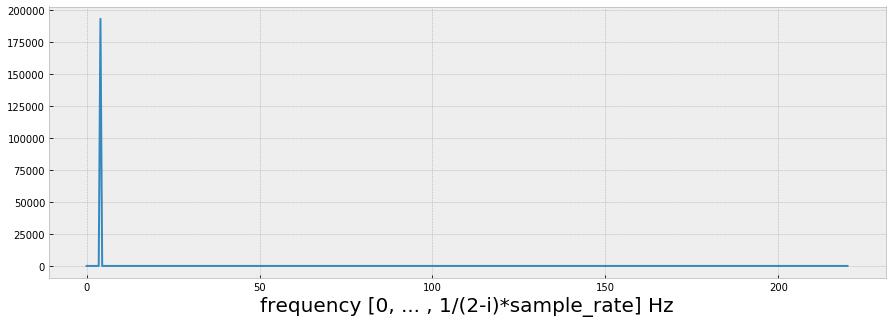

In [14]:
f = np.abs(np.fft.rfft(sinewave))**2
print (f[:10])
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.rfftfreq(N, 1.0/sample_rate), f)
pl.xlabel("frequency [0, ... , 1/(2-i)*sample_rate] Hz", fontsize=20)

# example on data

In [24]:
uberrides = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-jul14.csv")

In [37]:
uberridesshort = uberrides.iloc[::100]

In [38]:
uberridesshort["DateTime"] = pd.to_datetime(uberridesshort["Date/Time"])

//anaconda/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
uberridesshort["Date"] = uberridesshort["DateTime"].dt.date
uberridesshort["Hour"] = uberridesshort["DateTime"].dt.hour

//anaconda/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda/envs/py36/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
df = uberridesshort.groupby(['Date', "Hour"]).count().reset_index().rename(
    {"DateTime":"rides"}, axis=1)[["rides"]]

Text(0, 0.5, 'uber rides')

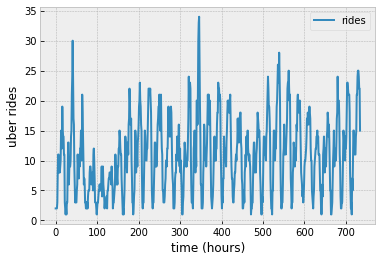

In [96]:
df.plot(), df.shape
pl.xlabel("time (hours)")
pl.ylabel("uber rides")

735


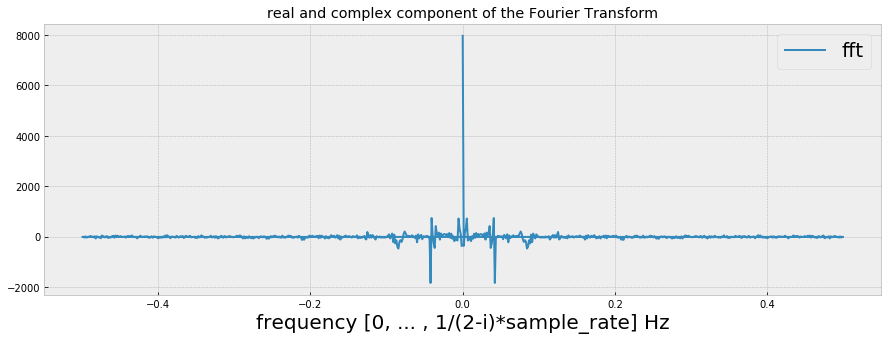

In [66]:
#Fourier transform
sample_rate = 1 #samples per hour
N = len(df)
f = np.fft.fft(df.rides.values)
print(len(f))
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(np.fft.fftfreq(N, 1.0/sample_rate), f, label="fft")
pl.xlabel("frequency [0, ... , 1/(2-i)*sample_rate] Hz", fontsize=20);
pl.legend(fontsize=20)
pl.title ("real and complex component of the Fourier Transform");

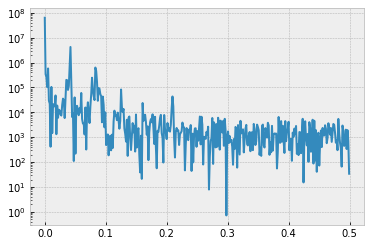

In [84]:
#Power spectrum
pl.plot(np.fft.rfftfreq(N, 1.0/sample_rate), np.abs(f[:int(N/2 + 0.5)])**2)
pl.yscale('log')

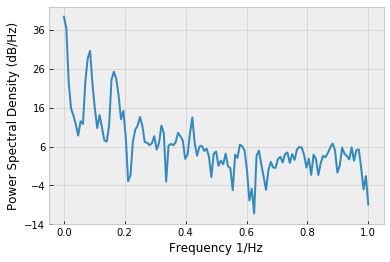

In [95]:
#power spectral density
psd, freq = pl.psd(df.rides.values)
plt.xlabel("Frequency 1/Hz");
